# Dog Breed Classifier using ViT from : [An Image is Worth 16x16 Words: Transformers for Image Recognition at Scale](https://arxiv.org/abs/2010.11929)

In [ ]:
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
import os
os.environ['KAGGLEHUB_CACHE'] = '/content/'
os.environ['DISABLE_COLAB_CACHE'] = 'true'  # Required for Colab

# Now download
import kagglehub
path = kagglehub.dataset_download('darshanthakare/dog-breeds-image-dataset')
print(path)  # Will show /content/kaggle-datasets/...


100%|██████████| 753M/753M [00:09<00:00, 87.4MB/s]

Extracting files...


/content/datasets/darshanthakare/dog-breeds-image-dataset/versions/1


## 1. Get Data

### 1.1 Setup Paths to Dataset

In [ ]:
from pathlib import Path

data_path = Path('datasets/darshanthakare/dog-breeds-image-dataset/versions/1')
data_path = data_path / 'Dog Breeds Image Dataset'

train_dir = Path('data') / 'train'
test_dir = Path('data') / 'test'

### 1.2 Explore Data

In [ ]:
# Count how many images are there for each class
images_per_class = {}

for child in data_path.iterdir():
    images_per_class[child.stem] = sum(1 for img_path in list(Path(child).glob('*.jpg')))

print(images_per_class)

{'bedlington_terrier': 148, 'husky': 189, 'coonhound': 130, 'basset_hound': 149, 'dhole': 150, 'cavapoo': 5, 'australian_terrier': 181, 'dachshund': 31, 'pekinese': 124, 'silky_terrier': 173, 'japanese_spaniel': 163, 'staffordshire_bullterrier': 132, 'keeshond': 135, 'cocker_spaniel': 174, 'kerryblue_terrier': 118, 'irish_wolfhound': 135, 'pug': 230, 'otterhound': 110, 'vizsla': 134, 'ibizan_hound': 154, 'puggle': 28, 'akita': 7, 'sharpei': 1, 'english_springer': 150, 'irish_setter': 130, 'groenendael': 126, 'havanese': 5, 'patterdale_terrier': 5, 'briard': 136, 'shihtzu': 198, 'indian_sheepdog': 1, 'golden_retriever': 172, 'beagle': 172, 'mexicanhairless': 144, 'welsh_terrier': 1, 'fox_terrier': 134, 'mix': 146, 'germanshepherd': 136, 'indian_bakharwal': 1, 'entlebucher': 200, 'medium_poodle': 2, 'sealyham_terrier': 132, 'pitbull': 7, 'flatcoated_retriever': 142, 'indian_gaddi': 1, 'rottweiler': 139, 'stbernard': 139, 'borzoi': 107, 'boston_bulldog': 173, 'chihuahua': 129, 'scottish_d

In [ ]:
unusable_classess = []

# Count how many classes have less than 5 images in them
for class_name, num_images in images_per_class.items():
    if num_images < 20:
        print(f'Class: {class_name} has only {num_images} images')
        unusable_classess.append(class_name)

Class: cavapoo has only 5 images
Class: akita has only 7 images
Class: sharpei has only 1 images
Class: havanese has only 5 images
Class: patterdale_terrier has only 5 images
Class: indian_sheepdog has only 1 images
Class: welsh_terrier has only 1 images
Class: indian_bakharwal has only 1 images
Class: medium_poodle has only 2 images
Class: pitbull has only 7 images
Class: indian_gaddi has only 1 images
Class: indian_spitz has only 1 images
Class: indian_chippiparai has only 1 images
Class: english_bulldog has only 5 images
Class: kombai has only 1 images
Class: kelpie_australian has only 8 images
Class: swedish_danish has only 4 images
Class: indian_mastiff has only 1 images
Class: indian_mudhol has only 1 images
Class: australian_cattledog has only 18 images
Class: spanish_waterdog has only 6 images
Class: norwegian_buhund has only 3 images
Class: dalmatian has only 2 images
Class: bichon_frise has only 11 images
Class: cockapoo has only 16 images
Class: germanlonghair_pointer has on

In [ ]:
print(f'Number of total Classes: {len(images_per_class)}')
print(f'Number of unusable classes: {len(unusable_classess)}\n')
print(f'Number of unusable classes: {len(images_per_class) - len(unusable_classess)}')

Number of total Classes: 157
Number of unusable classes: 37

Number of unusable classes: 120


### 1.3 Split data and reorganize

In [ ]:
# Make the train folder
if train_dir.exists():
    print('Train directory already exists')
else:
    train_dir.mkdir(exist_ok=True, parents=True)
    print(f'Creating Training directory at: {train_dir}')

Creating Training directory at: data/train


In [ ]:
# Make the test folder
if test_dir.exists():
    print('Test directory already exists')
else:
    test_dir.mkdir(exist_ok=True, parents=True)
    print(f'Creating Test directory at: {test_dir}')

Creating Test directory at: data/test


In [ ]:
# Create directories for usable classes and place them in train and test
for child in data_path.iterdir():
    if child.stem in unusable_classess:
        continue
    new_train_path = train_dir / child.stem
    new_test_path = test_dir / child.stem
    new_train_path.mkdir(exist_ok=True, parents=True)
    new_test_path.mkdir(exist_ok=True, parents=True)
    print(f'Created new train directory path: {new_train_path}')
    print(f'Created new test directory path: {new_test_path}')

Created new train directory path: data/train/bedlington_terrier
Created new test directory path: data/test/bedlington_terrier
Created new train directory path: data/train/husky
Created new test directory path: data/test/husky
Created new train directory path: data/train/coonhound
Created new test directory path: data/test/coonhound
Created new train directory path: data/train/basset_hound
Created new test directory path: data/test/basset_hound
Created new train directory path: data/train/dhole
Created new test directory path: data/test/dhole
Created new train directory path: data/train/australian_terrier
Created new test directory path: data/test/australian_terrier
Created new train directory path: data/train/dachshund
Created new test directory path: data/test/dachshund
Created new train directory path: data/train/pekinese
Created new test directory path: data/test/pekinese
Created new train directory path: data/train/silky_terrier
Created new test directory path: data/test/silky_terr

In [ ]:
import shutil
from sklearn.model_selection import train_test_split

# Set the percentage of data you want to keep
DATA_PERCENTAGE = 0.5  # Keep 50% of the data

for child in data_path.iterdir():
    if child.stem in unusable_classess:
        continue

    # Get all the image files within a folder
    image_files = list(child.glob('*.jpg'))

    # First, sample the percentage of data you want
    sampled_files, _ = train_test_split(
        image_files,
        train_size=DATA_PERCENTAGE,
        random_state=42,
        shuffle=True
    )

    # Then split the sampled data into train and test
    train_files, test_files = train_test_split(
        sampled_files,
        test_size=0.3,
        random_state=42,
    )

    # Copy training files
    train_dest = train_dir / child.stem
    for img_file in train_files:
        shutil.copy2(img_file, train_dest/img_file.name)

    # Copy testing files
    test_dest = test_dir / child.stem
    for img_file in test_files:
        shutil.copy2(img_file, test_dest/img_file.name)

    print(f'{child.stem}: {len(train_files)} train, {len(test_files)} test')

print("Move Complete")

bedlington_terrier: 20 train, 9 test
husky: 25 train, 12 test
coonhound: 18 train, 8 test
basset_hound: 20 train, 9 test
dhole: 21 train, 9 test
australian_terrier: 25 train, 11 test
dachshund: 4 train, 2 test
pekinese: 16 train, 8 test
silky_terrier: 23 train, 11 test
japanese_spaniel: 22 train, 10 test
staffordshire_bullterrier: 18 train, 8 test
keeshond: 18 train, 9 test
cocker_spaniel: 23 train, 11 test
kerryblue_terrier: 16 train, 7 test
irish_wolfhound: 18 train, 9 test
pug: 32 train, 14 test
otterhound: 15 train, 7 test
vizsla: 18 train, 8 test
ibizan_hound: 21 train, 9 test
puggle: 3 train, 2 test
english_springer: 21 train, 9 test
irish_setter: 18 train, 8 test
groenendael: 17 train, 8 test
briard: 18 train, 9 test
shihtzu: 27 train, 12 test
golden_retriever: 23 train, 11 test
beagle: 23 train, 11 test
mexicanhairless: 19 train, 9 test
fox_terrier: 18 train, 8 test
mix: 20 train, 9 test
germanshepherd: 18 train, 9 test
entlebucher: 28 train, 12 test
sealyham_terrier: 18 train,

### 1.4 Create Datasets

In [ ]:
import torch
import torchvision
from torch.utils.data import DataLoader, Dataset

In [ ]:
transform = torchvision.models.ViT_B_16_Weights.DEFAULT.transforms()

In [ ]:
import torch
import torchvision
from torch.utils.data import DataLoader, Dataset

# Get training data into a pytorch dataset
train_data = torchvision.datasets.ImageFolder(
    root=train_dir,
    transform=transform,
    target_transform=None,
)

# Get testing data into a pytorch dataset
test_data = torchvision.datasets.ImageFolder(
    root=test_dir,
    transform=transform,
    target_transform=None,
)
len(test_data), len(train_data)

(1081, 2335)

### 1.5 Create DataLoaders

In [ ]:
# Create train dataloader
train_dataloader = DataLoader(
    dataset=train_data,
    batch_size=32,
    shuffle=True,
    num_workers=2,
    pin_memory=True,
)

# Create test dataloader
test_dataloader = DataLoader(
    dataset=test_data,
    batch_size=32,
    shuffle=False,
    num_workers=2,
    pin_memory=True,
)

len(train_dataloader), len(test_dataloader)

(73, 34)

In [ ]:
class_names = train_data.classes


### 1.6 Inspect a Image and a label

In [ ]:
def denormalize(tensor, mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]):
    """Denormalize a normalized tensor image."""
    mean = torch.tensor(mean).view(3, 1, 1)
    std = torch.tensor(std).view(3, 1, 1)
    return torch.clamp(tensor * std + mean, 0, 1)

Text(0.5, 1.0, 'yorkshire_terrier')

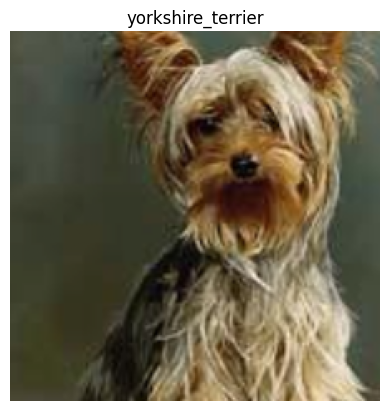

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

image_batch, label_batch = next(iter(train_dataloader))
image, label = image_batch[0], label_batch[0]
plt.imshow(denormalize(image).permute(1,2,0))
plt.axis(False)
plt.title(class_names[label])

## 2. Create Embedding from raw image

### 2.1 Create convolutional layer to segment images into patches

In [ ]:
from torch import nn

color_channels = 3
img_size = 224
patch_size = 16 # From paper
num_patch = (img_size**2) / patch_size**2

conv_layer = nn.Conv2d(
    in_channels=color_channels, # number of color channels
    out_channels=patch_size**2 * color_channels, # number of patches ,
    stride=patch_size,
    kernel_size=patch_size,
    padding=0,
)

conv_output = conv_layer(image.unsqueeze(0))
conv_output.shape

torch.Size([1, 768, 14, 14])

### 2.2 Create Flatten layer to make 2d patches into a 1d sequence

In [ ]:
flatten_layer = nn.Flatten(start_dim=2)
flatten_output = flatten_layer(conv_output)
# We need to have it in the shape N x (P*P*C) -> Permute
flatten_output = flatten_output.permute(0,2,1)
flatten_output.shape

torch.Size([1, 196, 768])

### 2.3 Create Class Token

In [ ]:
hidden_dim = 768 # From the paper for the base model

class_token = nn.Parameter(
    data=torch.randn(1,1,hidden_dim), # Needs to just be one tensor at the start of the flatten output
    requires_grad=True,
)

class_token.shape

torch.Size([1, 1, 768])

In [ ]:
patch_embedding = torch.cat(
    tensors=(class_token, flatten_output), # Prepend the class_token to the prev output
    dim=1
)
patch_embedding.shape

torch.Size([1, 197, 768])

### 2.4 Create Positional Embedding

In [ ]:
position_embedding = nn.Parameter(
    data=torch.randn(1,int(num_patch)+1,hidden_dim)
)
position_embedding.shape

torch.Size([1, 197, 768])

In [ ]:
embedded_patch = patch_embedding + position_embedding
embedded_patch.shape

torch.Size([1, 197, 768])

### 2.5 Making Embedding into a class

In [ ]:
import torch
from torch import nn

class PatchEmbedding(nn.Module):
    def __init__(self,
                patch_size: int=16,
                color_channels: int=3,
                hidden_dim: int=768,
                img_size: int=224,
                ):
        super().__init__()

        num_patches = (img_size // patch_size) ** 2

        # Create patches of the image and project to hidden_dim
        self.conv = nn.Conv2d(
            in_channels=color_channels,
            out_channels=hidden_dim,  # Project directly to embedding dimension
            kernel_size=patch_size,
            stride=patch_size,
            padding=0,
        )

        # Flatten the patches
        self.flatten = nn.Flatten(start_dim=2, end_dim=3)

        # Create class token (CLS token from BERT)
        self.class_token = nn.Parameter(
            torch.randn(1, 1, hidden_dim),
            requires_grad=True,
        )

        # Create positional embedding (for num_patches + 1 for class token)
        self.position_embedding = nn.Parameter(
            torch.randn(1, num_patches + 1, hidden_dim),
            requires_grad=True,
        )

    def forward(self, x):
        batch_size = x.shape[0]

        # Create patches and project to embedding dimension
        # Input: (batch, channels, height, width)
        # Output: (batch, hidden_dim, num_patches_h, num_patches_w)
        x = self.conv(x)

        # Flatten spatial dimensions
        # Output: (batch, hidden_dim, num_patches)
        x = self.flatten(x)

        # Permute to (batch, num_patches, hidden_dim)
        x = x.permute(0, 2, 1)

        # Expand class token for the batch
        class_tokens = self.class_token.expand(batch_size, -1, -1)

        # Prepend class token
        # Output: (batch, num_patches + 1, hidden_dim)
        x = torch.cat([class_tokens, x], dim=1)

        # Add positional embedding
        x = x + self.position_embedding

        return x # Need to add dropout in the final class

In [ ]:
patch_embedder = PatchEmbedding()
embedding = patch_embedder(image.unsqueeze(0))
embedding.shape

torch.Size([1, 197, 768])

## 3. Create the Multi-Self Attension head block

### 3.1 Make a Layer Norm before the MSA

In [ ]:
# Call the pytorch version
layer_norm = nn.LayerNorm(
    normalized_shape=hidden_dim
)

layer_output = layer_norm(embedded_patch)
layer_output.shape

torch.Size([1, 197, 768])

### 3.2 Make a Multi head Self Attension Layer

In [ ]:
msa_heads = 12 # From the paper

# Call the pytorch MSA function here
msa_layer = nn.MultiheadAttention(
    embed_dim=hidden_dim,
    num_heads=msa_heads,
    dropout=0.0,
    batch_first=True
)

msa_output, _ = msa_layer(layer_output, layer_output, layer_output) # Since we have k,q,v all the same
msa_output.shape

torch.Size([1, 197, 768])

### 3.3 Add the Residual connection after the MSA sub-block

In [ ]:
msa_block_output = msa_output + embedded_patch
msa_block_output.shape

torch.Size([1, 197, 768])

### 3.4 Make the entire MSA Block into a function

In [ ]:
class MSA_Block(nn.Module):
    def __init__(self,  # Fixed: was __init
                 embed_dim: int=768,
                 num_heads: int=12,
                 msa_dropout: float=0.0,
                ):

        super().__init__()

        # Initialize Layer Norm
        self.layer_norm = nn.LayerNorm(
            normalized_shape=embed_dim
        )

        # Initialize the MSA layer
        self.msa_layer = nn.MultiheadAttention(
            embed_dim=embed_dim,
            num_heads=num_heads,
            dropout=msa_dropout,
            batch_first=True
        )

    def forward(self, x):
        residual_connection = x
        x = self.layer_norm(x)
        # MultiheadAttention returns (output, attention_weights)
        x, _ = self.msa_layer(x, x, x)  # (query, key, value) - self-attention
        x = x + residual_connection
        return x

In [ ]:
msa_block = MSA_Block()
msa_block_output = msa_block(embedding)
msa_block_output.shape

torch.Size([1, 197, 768])

## 4. Create the Multi-Layer Perceptron Block

### 4.1 Create Layer Norm with same specs again

In [ ]:
# Call the pytorch version
layer_norm_2 = nn.LayerNorm(
    normalized_shape=hidden_dim
)

layer_output_2 = layer_norm_2(msa_block_output)
layer_output_2.shape

torch.Size([1, 197, 768])

### 4.2 Create a MLP Layer

In [ ]:
mlp_size = 3072 # From the paper
mlp_dropout = 0.1 # From table 3 in paper

# Builin Pytorch MLP can't be called as it has activation layer after every linear layer
# Need to build a sequential

mlp_layer = nn.Sequential(
    nn.Linear(in_features=hidden_dim, out_features=mlp_size),
    nn.Dropout(p=mlp_dropout),
    nn.GELU(),
    nn.Linear(in_features=mlp_size, out_features=hidden_dim),
    nn.Dropout(p=mlp_dropout),
)

mlp_output = mlp_layer(layer_output_2)
mlp_output.shape

torch.Size([1, 197, 768])

### 4.3 Create a Class for the MLP Block

In [ ]:
from torch import nn

class MLP_Block(nn.Module):
    def __init__(self,
                hidden_dim: int=768,
                mlp_size: int=3072,
                mlp_dropout: float=0.1):
        super().__init__()

        # Layer normalization
        self.layer_norm = nn.LayerNorm(normalized_shape=hidden_dim)

        # MLP with two layers and one GELU non-linearity
        self.mlp = nn.Sequential(
            nn.Linear(in_features=hidden_dim, out_features=mlp_size),
            nn.GELU(),
            nn.Dropout(p=mlp_dropout),
            nn.Linear(in_features=mlp_size, out_features=hidden_dim),
            nn.Dropout(p=mlp_dropout),
        )

    def forward(self, x):
        # Store residual connection
        residual_connection = x

        # Apply layer norm
        x = self.layer_norm(x)

        # Pass through MLP
        x = self.mlp(x)

        # Add residual connection
        x = x + residual_connection

        return x

In [ ]:
mlp_block = MLP_Block()
mlp_block_output = mlp_block(msa_block_output)
mlp_block_output.shape

torch.Size([1, 197, 768])

## 5. Make a Encoder block combining MLP and MSA

### 5.1 Create a Parent class and call both the classes sequentially

In [ ]:
from torch import nn

class TransformerEncoder(nn.Module):
    def __init__(self,
                hidden_dim: int=768,
                mlp_size: int=3072,
                mlp_dropout: float=0.1,
                num_heads: int=12,
                msa_dropout: float=0.0):
        super().__init__()

        # Multi-head Self-Attention block
        self.msa_block = MSA_Block(
            embed_dim=hidden_dim,
            msa_dropout=msa_dropout,
            num_heads=num_heads,
        )

        # MLP block
        self.mlp_block = MLP_Block(
            hidden_dim=hidden_dim,
            mlp_dropout=mlp_dropout,
            mlp_size=mlp_size,
        )

    def forward(self, x):
        # Pass through MSA block (with residual connection inside)
        x = self.msa_block(x)

        # Pass through MLP block (with residual connection inside)
        x = self.mlp_block(x)

        return x

In [ ]:
transformer_encoder = TransformerEncoder()
transformer_output = transformer_encoder(embedding)
transformer_output.shape

torch.Size([1, 197, 768])

## 6. Build the full Vision Transformer ViT

### 6.1 Create a VisionTransfomer Class to use all previous classes

In [ ]:
from torch import nn

class VisionTransformer(nn.Module):
    def __init__(self,
                hidden_dim: int=768,
                mlp_size: int=3072,
                mlp_dropout: float=0.1,
                msa_dropout: float=0.0,
                num_heads: int=12,
                patch_size: int=16,
                color_channels: int=3,
                img_size: int=224,
                num_layers: int=12,
                num_class: int=120):
        super().__init__()

        # Create patch embeddings
        self.embedder = PatchEmbedding(
            patch_size=patch_size,
            hidden_dim=hidden_dim,
            color_channels=color_channels,
            img_size=img_size,
        )

        # Dropout after embeddings
        self.dropout = nn.Dropout(p=mlp_dropout)

        # Stack of transformer encoder blocks
        self.transformer = nn.ModuleList([
            TransformerEncoder(
                hidden_dim=hidden_dim,
                mlp_size=mlp_size,
                mlp_dropout=mlp_dropout,
                msa_dropout=msa_dropout,
                num_heads=num_heads,
            ) for _ in range(num_layers)
        ])

        # Layer norm before classification head (Equation 4 in paper)
        self.layer_norm = nn.LayerNorm(normalized_shape=hidden_dim)

        # Classification head (outputs logits)
        self.classifier = nn.Linear(in_features=hidden_dim, out_features=num_class)

    def forward(self, x):
        # Create patch embeddings with positional encoding
        x = self.embedder(x)

        # Apply dropout
        x = self.dropout(x)

        # Pass through transformer encoder blocks
        for encoder in self.transformer:
            x = encoder(x)

        # Extract class token (first token)
        cls = x[:, 0]

        # Apply layer normalization
        x = self.layer_norm(cls)

        # Get class predictions (logits)
        x = self.classifier(x)

        return x

Text(0.5, 1.0, 'yorkshire_terrier')

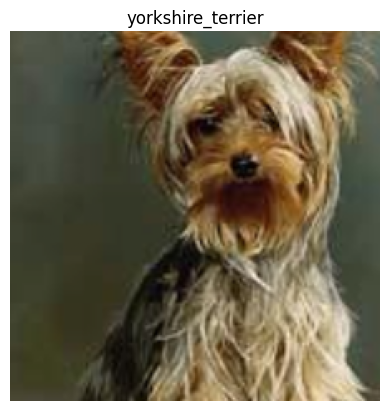

In [ ]:
vision_transformer = VisionTransformer()
output = vision_transformer(image.unsqueeze(0))
plt.imshow(denormalize(image).permute(1,2,0))
plt.axis(False)
plt.title(class_names[output.argmax()])

## 7. Compare with Official PyTorch version

### 7.1 Import torchinfo and inspect model

In [ ]:
!pip install torchinfo

In [ ]:
from torchinfo import summary

batch_size = 32

summary(
    model=vision_transformer,
    row_settings=['var_names'],
    col_width=20,
    input_size=(batch_size, color_channels, img_size, img_size),
    col_names=['input_size', 'output_size', 'num_params', 'trainable']
)

Layer (type (var_name))                                 Input Shape          Output Shape         Param #              Trainable
VisionTransformer (VisionTransformer)                   [32, 3, 224, 224]    [32, 120]            --                   True
├─PatchEmbedding (embedder)                             [32, 3, 224, 224]    [32, 197, 768]       152,064              True
│    └─Conv2d (conv)                                    [32, 3, 224, 224]    [32, 768, 14, 14]    590,592              True
│    └─Flatten (flatten)                                [32, 768, 14, 14]    [32, 768, 196]       --                   --
├─Dropout (dropout)                                     [32, 197, 768]       [32, 197, 768]       --                   --
├─ModuleList (transformer)                              --                   --                   --                   True
│    └─TransformerEncoder (0)                           [32, 197, 768]       [32, 197, 768]       --                   True
│    │ 

In [ ]:
vit_pytorch = torchvision.models.vit_b_16()

# Change the number of classes to 120
vit_pytorch.heads = nn.Sequential(
    nn.Linear(in_features=hidden_dim, out_features=len(class_names), bias=True)
)

summary(
    model=vit_pytorch,
    row_settings=['var_names'],
    col_width=20,
    input_size=(batch_size, color_channels, img_size, img_size),
    col_names=['input_size', 'output_size', 'num_params', 'trainable']
)

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
VisionTransformer (VisionTransformer)                        [32, 3, 224, 224]    [32, 120]            768                  True
├─Conv2d (conv_proj)                                         [32, 3, 224, 224]    [32, 768, 14, 14]    590,592              True
├─Encoder (encoder)                                          [32, 197, 768]       [32, 197, 768]       151,296              True
│    └─Dropout (dropout)                                     [32, 197, 768]       [32, 197, 768]       --                   --
│    └─Sequential (layers)                                   [32, 197, 768]       [32, 197, 768]       --                   True
│    │    └─EncoderBlock (encoder_layer_0)                   [32, 197, 768]       [32, 197, 768]       7,087,872            True
│    │    └─EncoderBlock (encoder_layer_1)                   [32, 197, 768]       [32, 197, 76

### 7.2 Verify through code they are exactly the same model

In [ ]:
# Loop through every parameter in
custom_params = 0
pytorch_params = 0

for param in vision_transformer.parameters():
    custom_params += torch.numel(param)

for param in vit_pytorch.parameters():
    pytorch_params += torch.numel(param)


if custom_params == pytorch_params:
    print(f'Both models are identical!')
    print(f'Number of parameters: {custom_params}')
else:
    print('Models are not the same')
    print(f'Number of parameters in custom implementation: {custom_params}')
    print(f'Number of parameters in pytorch implementation: {pytorch_params}')

Both models are identical!
Number of parameters: 85890936


## 8. Prepare Model for training

### 8.1 Freeze model weights

In [ ]:
for params in vision_transformer.parameters():
    params.requires_grad = False

### 8.2 Unfreeze only the classifier layer

In [ ]:
for param in vision_transformer.classifier.parameters():
    param.requires_grad = True

In [ ]:
summary(
    model=vision_transformer,
    row_settings=['var_names'],
    col_width=20,
    input_size=(batch_size, color_channels, img_size, img_size),
    col_names=['input_size', 'output_size', 'num_params', 'trainable']
)

Layer (type (var_name))                                 Input Shape          Output Shape         Param #              Trainable
VisionTransformer (VisionTransformer)                   [32, 3, 224, 224]    [32, 120]            --                   Partial
├─PatchEmbedding (embedder)                             [32, 3, 224, 224]    [32, 197, 768]       152,064              False
│    └─Conv2d (conv)                                    [32, 3, 224, 224]    [32, 768, 14, 14]    (590,592)            False
│    └─Flatten (flatten)                                [32, 768, 14, 14]    [32, 768, 196]       --                   --
├─Dropout (dropout)                                     [32, 197, 768]       [32, 197, 768]       --                   --
├─ModuleList (transformer)                              --                   --                   --                   False
│    └─TransformerEncoder (0)                           [32, 197, 768]       [32, 197, 768]       --                   False


### 8.3 Load Pre-Trained weights one IMAGENETV1

In [ ]:
# Load the entire pretrained model
pretrained_vit = torchvision.models.vit_b_16(weights='DEFAULT')

# Get the state dict
pretrained_state_dict = pretrained_vit.state_dict()

Downloading: "https://download.pytorch.org/models/vit_b_16-c867db91.pth" to /root/.cache/torch/hub/checkpoints/vit_b_16-c867db91.pth


100%|██████████| 330M/330M [00:03<00:00, 87.6MB/s]


Since the names of the intermediate layers and the conventions of class blocks and modules inside both are different, we cannot readily load the pretrained weights into the custom model.

So we defer, and use the PyTorch implementation.

At this juncture it is impractical to train a ViT from scratch as there are 85M trainable parameters and it would need huge amounts of data and several days on a TPU (according to the paper). The dog classifier dataset has barely 20,000 images.

Subject to current constraints, we directly use the pre-trained weights on the PyTorch version of the model.

## 9. Create the Training Loop

Each epoch consists of 2 things:
- Training Loop: Where the data in the `train_dataloader` are fed into the system, their prediction logits gathered, their prediction probabilities gained, and these are used in the backpropagation
- Test Loop: After every training step, we would need a test/val step where the data of the `test_dataloader` are used to predict and the test/val loss and accuracy are calculated.

Both these metrics are monitored to ensure that the model does not over or underfit.

### 9.1 Create the `training_step()` function

In [ ]:
# Setup Loss function
loss_fn = nn.CrossEntropyLoss()

# Setup optimizer
optimizer = torch.optim.Adam(params=pretrained_vit.parameters(), lr=0.001)

In [ ]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device: torch.device) -> Tuple[float, float]:
    """Trains a PyTorch model for a single epoch.

    Turns a target PyTorch model to training mode and then
    runs through all of the required training steps (forward
    pass, loss calculation, optimizer step).

    Args:
    model: A PyTorch model to be trained.
    dataloader: A DataLoader instance for the model to be trained on.
    loss_fn: A PyTorch loss function to minimize.
    optimizer: A PyTorch optimizer to help minimize the loss function.
    device: A target device to compute on (e.g. "cuda" or "cpu").

    Returns:
    A tuple of training loss and training accuracy metrics.
    In the form (train_loss, train_accuracy). For example:

    (0.1112, 0.8743)
    """
    # Put model in train mode
    model.train()

    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0

    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metric across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

Training:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 1/1 | Train Loss: 5.2821 | Train Accuracy: 0.0068


### 9.2 Create `test_step()` function

In [ ]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device: torch.device) -> Tuple[float, float]:
    """Tests a PyTorch model for a single epoch.

    Turns a target PyTorch model to "eval" mode and then performs
    a forward pass on a testing dataset.

    Args:
    model: A PyTorch model to be tested.
    dataloader: A DataLoader instance for the model to be tested on.
    loss_fn: A PyTorch loss function to calculate loss on the test data.
    device: A target device to compute on (e.g. "cuda" or "cpu").

    Returns:
    A tuple of testing loss and testing accuracy metrics.
    In the form (test_loss, test_accuracy). For example:

    (0.0223, 0.8985)
    """
    # Put model in eval mode
    model.eval()

    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0

    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

    # Adjust metrics to get average loss and accuracy per batch
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

 Train Loss: 4.8929 | Train Accuracy: 0.0074


### 9.3 Combine both to get all encomppassing `train()`

In [ ]:
"""
Contains functions for training and testing a PyTorch model.
"""
import torch

from tqdm.auto import tqdm
from typing import Dict, List, Tuple

def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device: torch.device) -> Tuple[float, float]:
    """Trains a PyTorch model for a single epoch.

    Turns a target PyTorch model to training mode and then
    runs through all of the required training steps (forward
    pass, loss calculation, optimizer step).

    Args:
    model: A PyTorch model to be trained.
    dataloader: A DataLoader instance for the model to be trained on.
    loss_fn: A PyTorch loss function to minimize.
    optimizer: A PyTorch optimizer to help minimize the loss function.
    device: A target device to compute on (e.g. "cuda" or "cpu").

    Returns:
    A tuple of training loss and training accuracy metrics.
    In the form (train_loss, train_accuracy). For example:

    (0.1112, 0.8743)
    """
    # Put model in train mode
    model.train()

    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0

    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metric across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device: torch.device) -> Tuple[float, float]:
    """Tests a PyTorch model for a single epoch.

    Turns a target PyTorch model to "eval" mode and then performs
    a forward pass on a testing dataset.

    Args:
    model: A PyTorch model to be tested.
    dataloader: A DataLoader instance for the model to be tested on.
    loss_fn: A PyTorch loss function to calculate loss on the test data.
    device: A target device to compute on (e.g. "cuda" or "cpu").

    Returns:
    A tuple of testing loss and testing accuracy metrics.
    In the form (test_loss, test_accuracy). For example:

    (0.0223, 0.8985)
    """
    # Put model in eval mode
    model.eval()

    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0

    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

    # Adjust metrics to get average loss and accuracy per batch
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module,
          epochs: int,
          device: torch.device) -> Dict[str, List]:
    """Trains and tests a PyTorch model.

    Passes a target PyTorch models through train_step() and test_step()
    functions for a number of epochs, training and testing the model
    in the same epoch loop.

    Calculates, prints and stores evaluation metrics throughout.

    Args:
    model: A PyTorch model to be trained and tested.
    train_dataloader: A DataLoader instance for the model to be trained on.
    test_dataloader: A DataLoader instance for the model to be tested on.
    optimizer: A PyTorch optimizer to help minimize the loss function.
    loss_fn: A PyTorch loss function to calculate loss on both datasets.
    epochs: An integer indicating how many epochs to train for.
    device: A target device to compute on (e.g. "cuda" or "cpu").

    Returns:
    A dictionary of training and testing loss as well as training and
    testing accuracy metrics. Each metric has a value in a list for
    each epoch.
    In the form: {train_loss: [...],
              train_acc: [...],
              test_loss: [...],
              test_acc: [...]}
    For example if training for epochs=2:
             {train_loss: [2.0616, 1.0537],
              train_acc: [0.3945, 0.3945],
              test_loss: [1.2641, 1.5706],
              test_acc: [0.3400, 0.2973]}
    """
    # Create empty results dictionary
    results = {"train_loss": [],
               "train_acc": [],
               "test_loss": [],
               "test_acc": []
    }

    # Make sure model on target device
    model.to(device)

    # Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                          dataloader=train_dataloader,
                                          loss_fn=loss_fn,
                                          optimizer=optimizer,
                                          device=device)
        test_loss, test_acc = test_step(model=model,
          dataloader=test_dataloader,
          loss_fn=loss_fn,
          device=device)

        # Print out what's happening
        print(
          f"Epoch: {epoch+1} | "
          f"train_loss: {train_loss:.4f} | "
          f"train_acc: {train_acc:.4f} | "
          f"test_loss: {test_loss:.4f} | "
          f"test_acc: {test_acc:.4f}"
        )

        # Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    # Return the filled results at the end of the epochs
    return results

### 9.4 Recreate the model and call the training function

In [ ]:
# 1. Load and modify model
vit = torchvision.models.vit_b_16(weights='DEFAULT')

# Set seeds for reproducibility
torch.manual_seed(42)
torch.cuda.manual_seed(42)

vit.heads = nn.Sequential(
    nn.Linear(in_features=768, out_features=len(class_names), bias=True)
)

# 2. Freeze base, unfreeze head
for param in vit.parameters():
    param.requires_grad = False

for param in vit.heads.parameters():
    param.requires_grad = True

# 3. Setup training components
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(
    params=[p for p in vit.parameters() if p.requires_grad], # Only pass in the trainable parameters of classifier head
    lr=1e-3,  # Lower learning rate for fine-tuning
    weight_decay=0.03  # Add some regularization
)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer,
    mode='min',
    factor=0.5,
    patience=5,
)

# 4. Train
results = train(
    model=vit,
    train_dataloader=train_dataloader,
    test_dataloader=test_dataloader,
    loss_fn=loss_fn,
    optimizer=optimizer,
    epochs=10,
    device=device
)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 2.2910 | train_acc: 0.7465 | test_loss: 0.6529 | test_acc: 0.9306
Epoch: 2 | train_loss: 0.4745 | train_acc: 0.9374 | test_loss: 0.4422 | test_acc: 0.9437
Epoch: 3 | train_loss: 0.3758 | train_acc: 0.9563 | test_loss: 0.4228 | test_acc: 0.9416
Epoch: 4 | train_loss: 0.3524 | train_acc: 0.9538 | test_loss: 0.4153 | test_acc: 0.9388
Epoch: 5 | train_loss: 0.3374 | train_acc: 0.9627 | test_loss: 0.4177 | test_acc: 0.9354
Epoch: 6 | train_loss: 0.3331 | train_acc: 0.9632 | test_loss: 0.4081 | test_acc: 0.9400
Epoch: 7 | train_loss: 0.3283 | train_acc: 0.9653 | test_loss: 0.4048 | test_acc: 0.9462
Epoch: 8 | train_loss: 0.3305 | train_acc: 0.9623 | test_loss: 0.4042 | test_acc: 0.9443
Epoch: 9 | train_loss: 0.3243 | train_acc: 0.9666 | test_loss: 0.4080 | test_acc: 0.9404
Epoch: 10 | train_loss: 0.3275 | train_acc: 0.9657 | test_loss: 0.4062 | test_acc: 0.9400


## 10. Inspect Model performance

### 10.1 Inspect Loss Curves

In [ ]:
import numpy as np

def plot_loss_curves(results):
  loss = results['train_loss']
  test_loss = results['test_loss']

  accuracy = results['train_acc']
  test_accuracy = results['test_acc']

  epochs = range(len(results['train_loss']))

  plt.figure(figsize=(15,7))

  #Plot loss
  plt.subplot(1,2,1)
  plt.plot(epochs, loss, label='train_loss')
  plt.plot(epochs, test_loss, label='test_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.subplot(1,2,2)
  plt.plot(epochs, accuracy, label='train_accuracy')
  plt.plot(epochs, test_accuracy, label='test_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend()

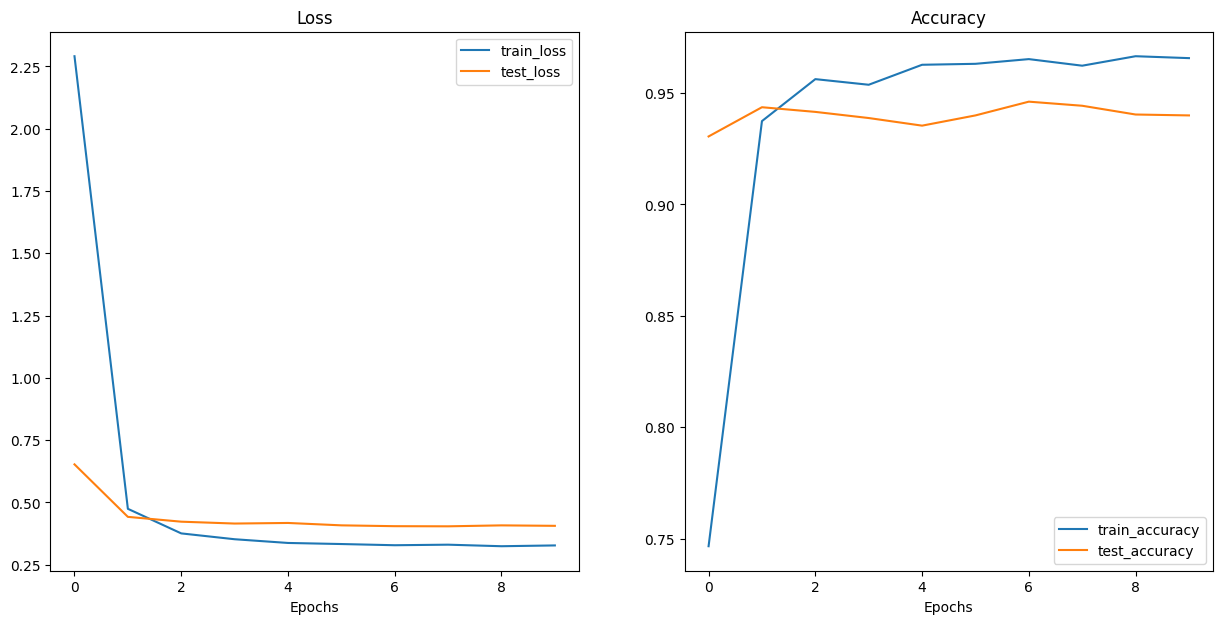

In [ ]:
plot_loss_curves(results)

### 10.2 Save Model

In [ ]:
def save_model(model: torch.nn.Module,
               target_dir: str,
               model_name: str):

  # Create model save directory
  target_dir_path = Path(target_dir)
  target_dir_path.mkdir(exist_ok=True, parents=True)

  # Check if model name correct
  assert model_name.endswith('.pth') or model_name.endswith('.pt'), "model_name should end with '.pth' or '.pt' "
  model_save_path = target_dir_path / model_name

  #Save model
  print(f'Saving model to {model_save_path}')
  torch.save(obj=model.state_dict(),
             f=model_save_path)

In [ ]:
save_model(vit,
           'models',
           'dog_breed_classifier_v2_50_percent.pth')

Saving model to models/dog_breed_classifier_v1.pth
